<a href="https://colab.research.google.com/github/Tomoyuki0223/machine_learning_question/blob/main/kadai3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=d32f473802d6b66093d38be2d5b0f1e135f61fa506253cc75bac13a75af72717
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
x_T = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
y_T = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])
x = x_T.reshape(-1, 1) #列ベクトルに変換
y = y_T.reshape(-1, 1) #列ベクトルに変換

In [4]:
alfa_1 = 10**-9
alfa_2 = 10**-6
alfa_3 = 10**-3
alfa_4 = 1

#（1）9次関数によるリッジ回帰

In [5]:
X_2_to = np.concatenate([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9], 1)
X = np.insert(X_2_to, 0, 1, axis=1) #1列目に単位行列を入れる
X_T = X.T
X_T_X = np.dot(X_T, X) #X_T * X

In [6]:
X_T_X_plus_alfa_I_1 = X_T_X + alfa_1 * np.eye(10) #X_T*X + α*I
X_T_X_inv_1 = np.linalg.inv(X_T_X_plus_alfa_I_1)
omega_1 = X_T_X_inv_1 @ X_T @ y
y_1 = np.dot(X, omega_1)

In [7]:
X_T_X_plus_alfa_I_2 = X_T_X + alfa_2 * np.eye(10) #X_T*X + α*I
X_T_X_inv_2 = np.linalg.inv(X_T_X_plus_alfa_I_2)
omega_2 = X_T_X_inv_2 @ X_T @ y
y_2 = np.dot(X, omega_2)

In [8]:
X_T_X_plus_alfa_I_3 = X_T_X + alfa_3 * np.eye(10) #X_T*X + α*I
X_T_X_inv_3 = np.linalg.inv(X_T_X_plus_alfa_I_3)
omega_3 = X_T_X_inv_3 @ X_T @ y
y_3 = np.dot(X, omega_3)

In [9]:
X_T_X_plus_alfa_I_4 = X_T_X + alfa_4 * np.eye(10) #X_T*X + α*I
X_T_X_inv_4 = np.linalg.inv(X_T_X_plus_alfa_I_4)
omega_4 = X_T_X_inv_4 @ X_T @ y
y_4 = np.dot(X, omega_4)

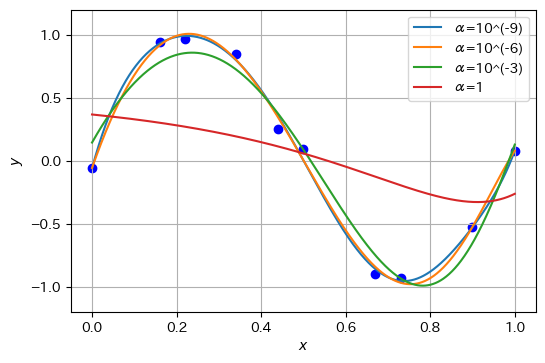

In [10]:
x_plot = np.linspace(0, 1, 1000)
y_plot_1 = np.polyval(omega_1[::-1],x_plot)
y_plot_2 = np.polyval(omega_2[::-1],x_plot)
y_plot_3 = np.polyval(omega_3[::-1],x_plot)
y_plot_4 = np.polyval(omega_4[::-1],x_plot)

fig, ax = plt.subplots(dpi=100)
ax.scatter(x, y, marker='o', color='b')
ax.plot(x_plot, y_plot_1, label=r'α=10^(-9)')
ax.plot(x_plot, y_plot_2, label=r'α=10^(-6)')
ax.plot(x_plot, y_plot_3, label=r'α=10^(-3)')
ax.plot(x_plot, y_plot_4, label=r'α=1')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-1.2, 1.2)
plt.legend(loc='upper right')
ax.grid()

#（2）パラメータのL2ノルム

### （i）α=10^(-9)の場合

In [11]:
ipu_1 = y - y_1
purpose_1_1_sqrt = np.linalg.norm(ipu_1, ord=2) #||y - Xω||
purpose_1_1 = purpose_1_1_sqrt**2 #||y - Xω||^2

In [12]:
purpose_1_2_sqrt = np.linalg.norm(omega_1, ord=2) #||ω||
purpose_1 = purpose_1_1 + alfa_1 * purpose_1_2_sqrt**2
purpose_1

0.024080337569994184

### （ii）α=10^(-6)の場合

In [13]:
ipu_2 = y - y_2
purpose_2_1_sqrt = np.linalg.norm(ipu_2, ord=2)
purpose_2_1 = purpose_2_1_sqrt**2

In [14]:
purpose_2_2_sqrt = np.linalg.norm(omega_2, ord=2)
purpose_2 = purpose_2_1 + alfa_2 * purpose_2_2_sqrt**2
purpose_2

0.026071843136479343

### （iii）α=10^(-3)の場合

In [15]:
ipu_3 = y - y_3
purpose_3_1_sqrt = np.linalg.norm(ipu_3, ord=2)
purpose_3_1 = purpose_3_1_sqrt**2

In [16]:
purpose_3_2_sqrt = np.linalg.norm(omega_3, ord=2)
purpose_3 = purpose_3_1 + alfa_3 * purpose_3_2_sqrt**2
purpose_3

0.40487198125572027

### （iv）α=1の場合

In [17]:
ipu_4 = y - y_4
purpose_4_1_sqrt = np.linalg.norm(ipu_4, ord=2)
purpose_4_1 = purpose_4_1_sqrt**2

In [18]:
purpose_4_2_sqrt = np.linalg.norm(omega_4, ord=2)
purpose_4 = purpose_4_1 + alfa_4 * purpose_4_2_sqrt**2
purpose_4

3.412644248762196

#（3）検証データに基づくαの選択

In [19]:
x_valid_T = np.array([ 0.05,  0.08,  0.12,  0.16,  0.28,  0.44,  0.47,  0.55,  0.63,  0.99])
y_valid_T = np.array([ 0.35,  0.58,  0.68,  0.87,  0.83,  0.45,  0.01, -0.36, -0.83, -0.06])
x_valid = x_valid_T.reshape(-1, 1) #列ベクトルに変換
y_valid = y_valid_T.reshape(-1, 1) #列ベクトルに変換

In [20]:
y_valid_hat_1 = np.polyval(omega_1[::-1],x_valid)
y_valid_hat_2 = np.polyval(omega_2[::-1],x_valid)
y_valid_hat_3 = np.polyval(omega_3[::-1],x_valid)
y_valid_hat_4 = np.polyval(omega_4[::-1],x_valid)

In [21]:
MSR_1 = np.mean((y_valid - y_valid_hat_1) ** 2)
MSR_1

0.010502323510113673

In [22]:
MSR_2 = np.mean((y_valid - y_valid_hat_2) ** 2)
MSR_2 #最も汎化性能が高い

0.010066159816947789

In [23]:
MSR_3 = np.mean((y_valid - y_valid_hat_3) ** 2)
MSR_3

0.017790450111694892

In [24]:
MSR_4 = np.mean((y_valid - y_valid_hat_4) ** 2)
MSR_4

0.17280430903144864